In [19]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib inline

In [20]:
fieldsweep = np.arange(0.11, 0.3, 0.05).tolist()
fieldsweep.append(0.3)

fieldsweep2 = [0.05, 0.08, 0.13, 0.18, 0.2]
dfList = []

for i in range(len(fieldsweep2)):
    df = pd.read_csv('./2019-07-02/test_calibCheck_F%.3f_2019-07-02_1.csv' % fieldsweep2[i], comment="#")
    dfList.append(df)


for i in range(len(fieldsweep)):
    df = pd.read_csv('./2019-07-01/3V_phi0_calibCheck_F%.3f_2019-07-01_1.csv' % fieldsweep[i], comment="#")
    dfList.append(df)

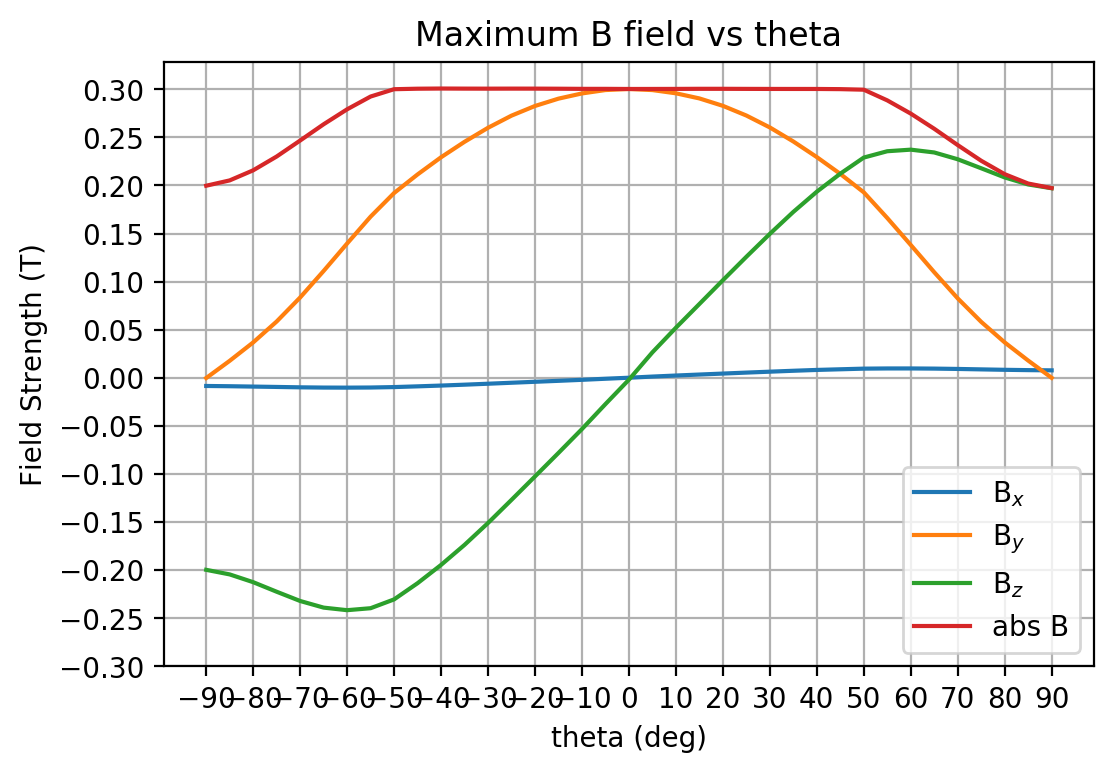

In [5]:
plt.figure(dpi=200)
plt.plot(df.theta, df.Xfield_avg, label = 'B$_x$')
plt.plot(df.theta, df.Yfield_avg, label = 'B$_y$')
plt.plot(df.theta, df.Zfield_avg, label = 'B$_z$')
plt.plot(df.theta, df.Bmag, label = 'abs B')
plt.legend()
plt.title('Maximum B field vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Field Strength (T)')
plt.yticks(np.arange(-0.3, 0.35, 0.05))
plt.xticks(np.arange(-90, 100, 10))
plt.grid()

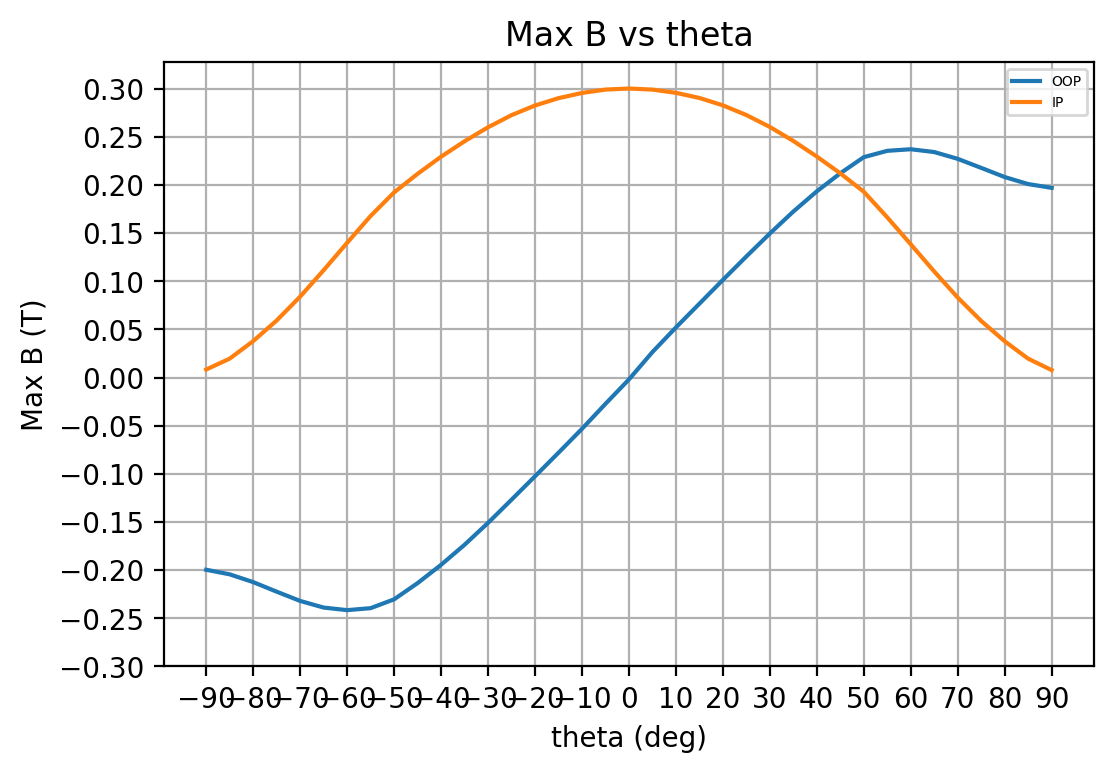

In [6]:
plt.figure(dpi=200)
def plotCurve(df):
    plt.plot(df.theta, df.Zfield_avg, label = 'OOP')
    plt.plot(df.theta, np.sqrt(df.Xfield_avg**2 + df.Yfield_avg**2), label = 'IP')
    
plotCurve(dfList[-1])
plt.yticks(np.arange(-0.3, 0.31, step=0.05))
plt.xticks(np.arange(-90, 100, 10))
plt.grid()

plt.title('Max B vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Max B (T)')
plt.legend(prop={'size': 5})

### B vs theta for different B center, calibration done at 2V

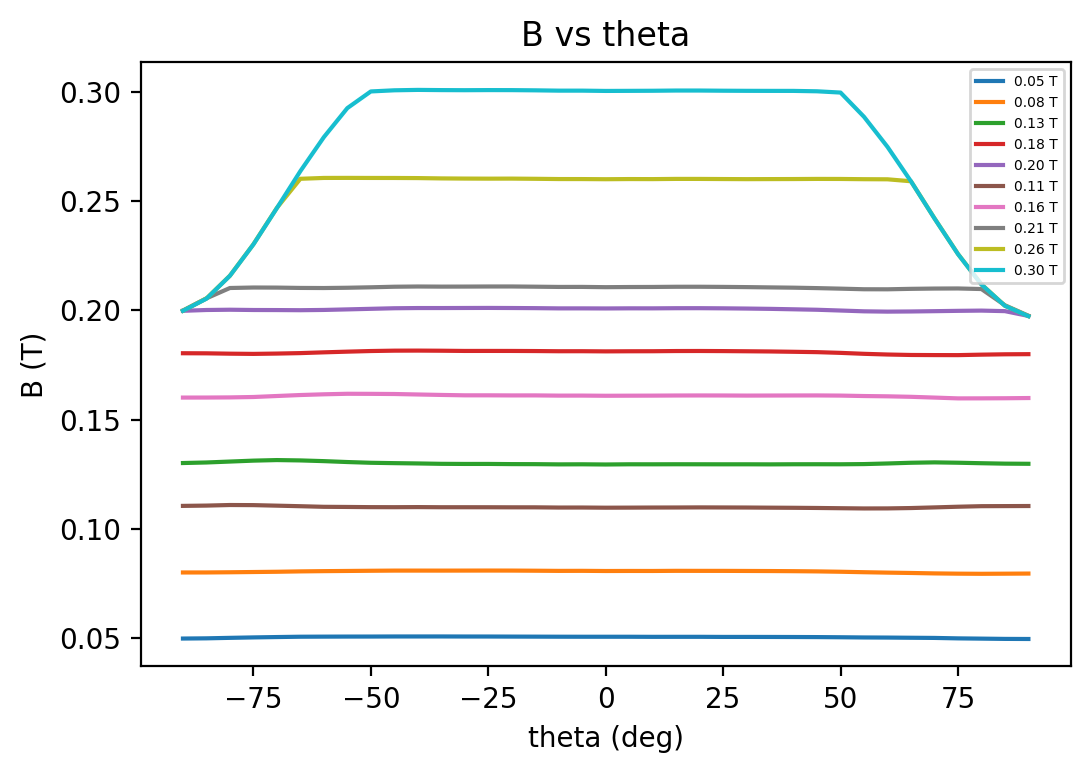

In [7]:
plt.figure(dpi=200)
def plotCurve(df):
    plt.plot(df.theta, df.Bmag, label = '%.2f T' % df.Bmag.max())
    
for df in dfList:
    plotCurve(df)

plt.title('B vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('B (T)')
plt.legend(prop={'size': 5})

### Percentage deviation from center field

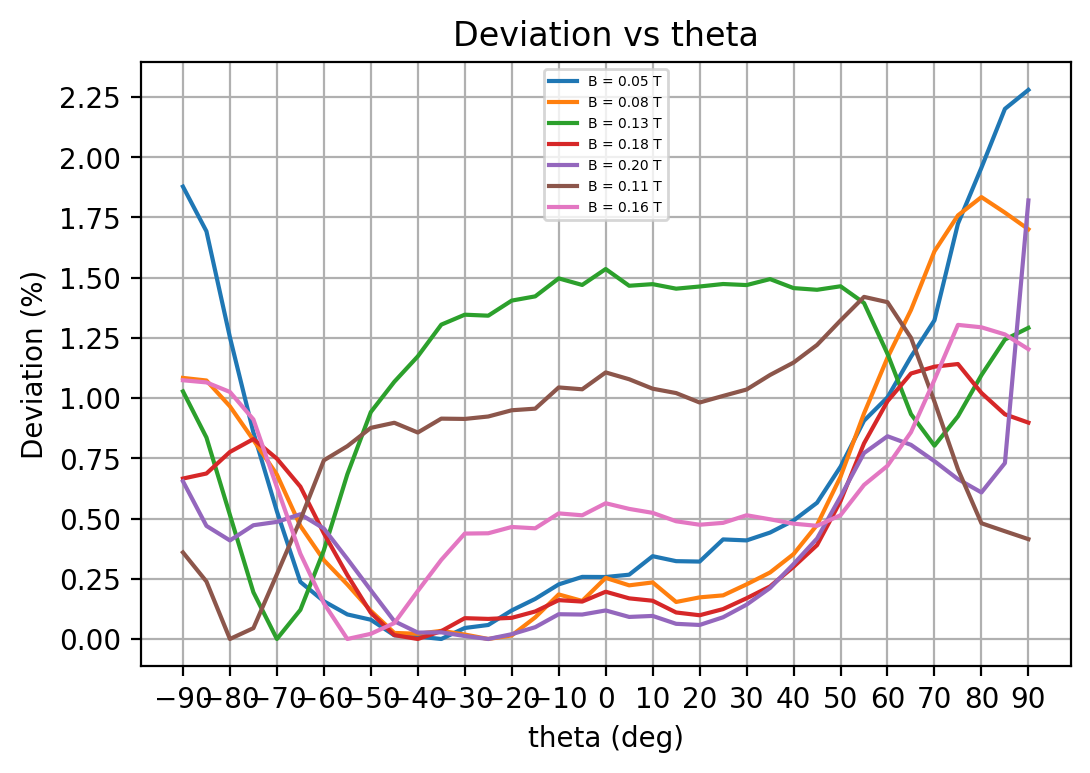

In [21]:
plt.figure(dpi=200)

for i in range(3):
    dfList.pop()

def plotsd(df):
    deviation = (abs(df.Bmag.values - df.Bmag.max()))/df.Bmag.max()*100
    plt.plot(df.theta, deviation, label = 'B = %.2f T' % df.Bmag.values.max())
    plt.legend(prop={'size': 5})

for i in range(len(dfList)):
    plotsd(dfList[i])
    
plt.title('Deviation vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Deviation (%)')
plt.xticks(np.arange(-90, 100, 10))
plt.yticks(np.arange(0.0, 2.5, 0.25))
plt.grid()
plt.legend(prop={'size': 5})

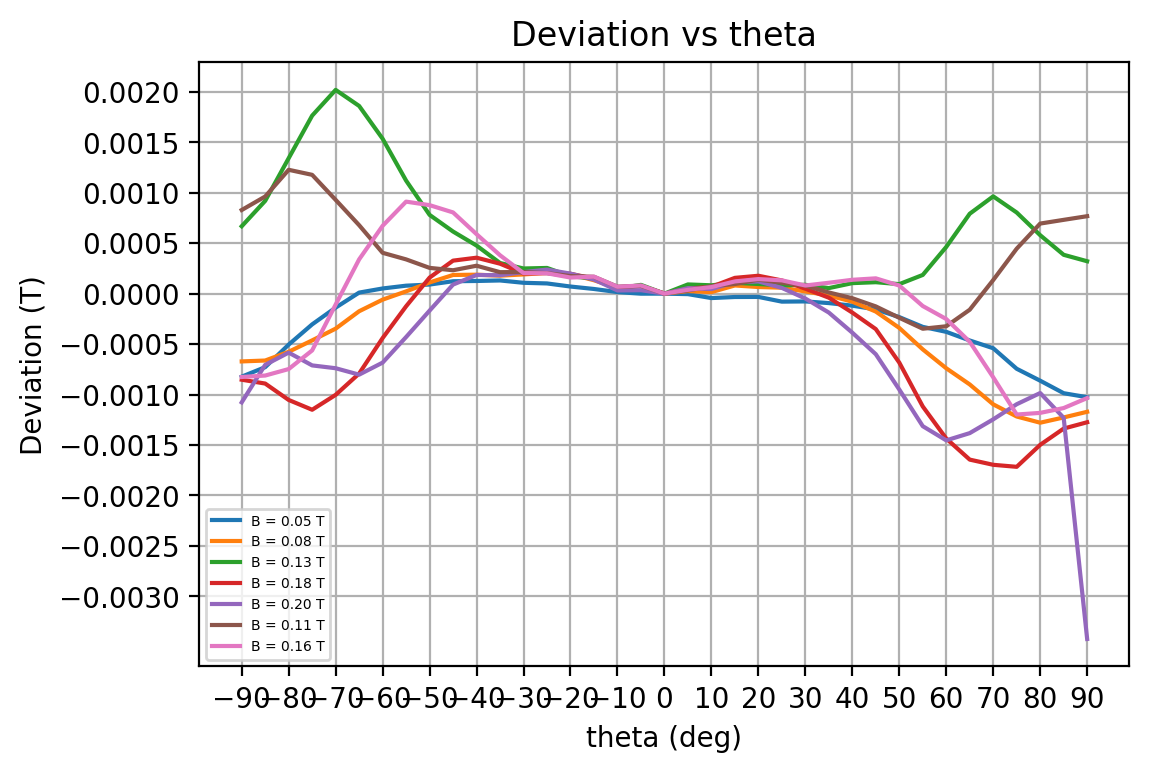

In [22]:
plt.figure(dpi=200)
    
def plotsd(df):
    deviation = (df.Bmag.values - df[abs(df.theta)<0.01].Bmag.values[0])
    plt.plot(df.theta, deviation, label = 'B = %.2f T' % df.Bmag.values.max())
    plt.legend(prop={'size': 5})

for i in range(len(dfList)):
    plotsd(dfList[i])
    
plt.title('Deviation vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Deviation (T)')
plt.legend(prop={'size': 5})
plt.yticks(np.arange(-0.003, 0.0025, 0.0005))
plt.xticks(np.arange(-90, 100, 10))
plt.grid()

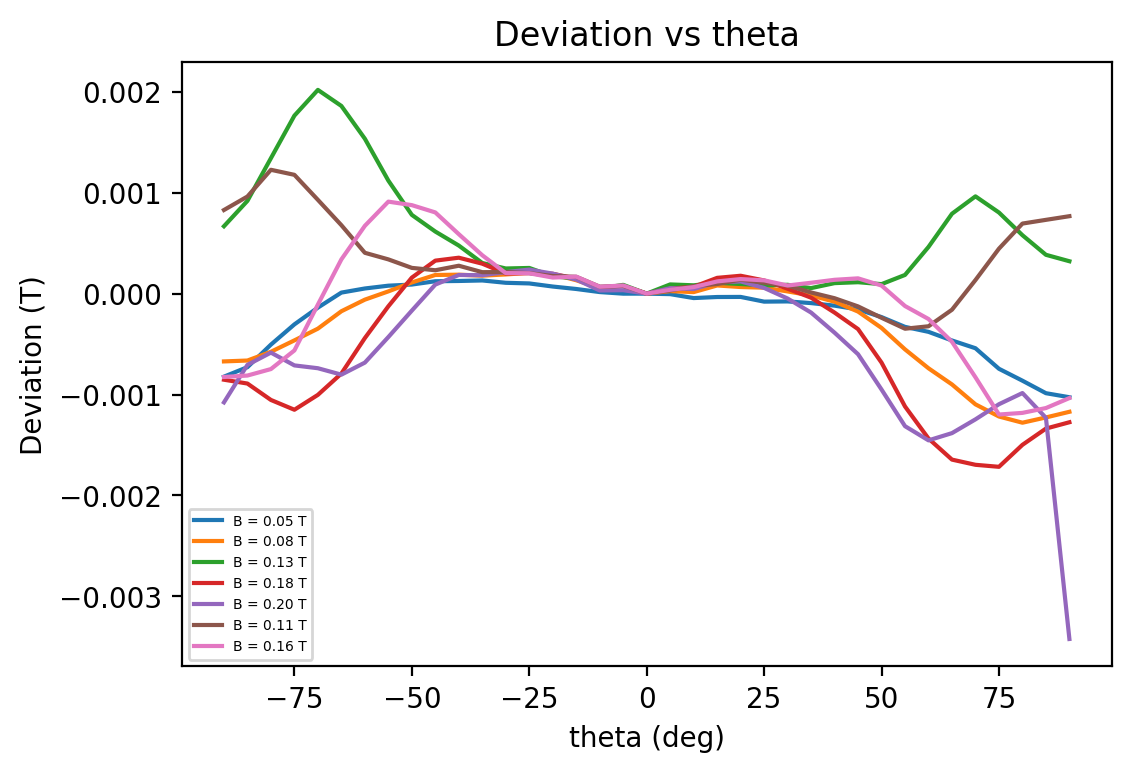

In [6]:
plt.figure(dpi=200)
def plotsd(df):
    deviation = (df.Bmag.values - df[abs(df.theta)<0.01].Bmag.values[0])
    plt.plot(df.theta, deviation, label = 'B = %.2f T' % df.Bmag.values.max())
    plt.legend(prop={'size': 5})

for i in range(len(dfList)):
    plotsd(dfList[i])
    
plt.title('Deviation vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Deviation (T)')
plt.legend(prop={'size': 5})

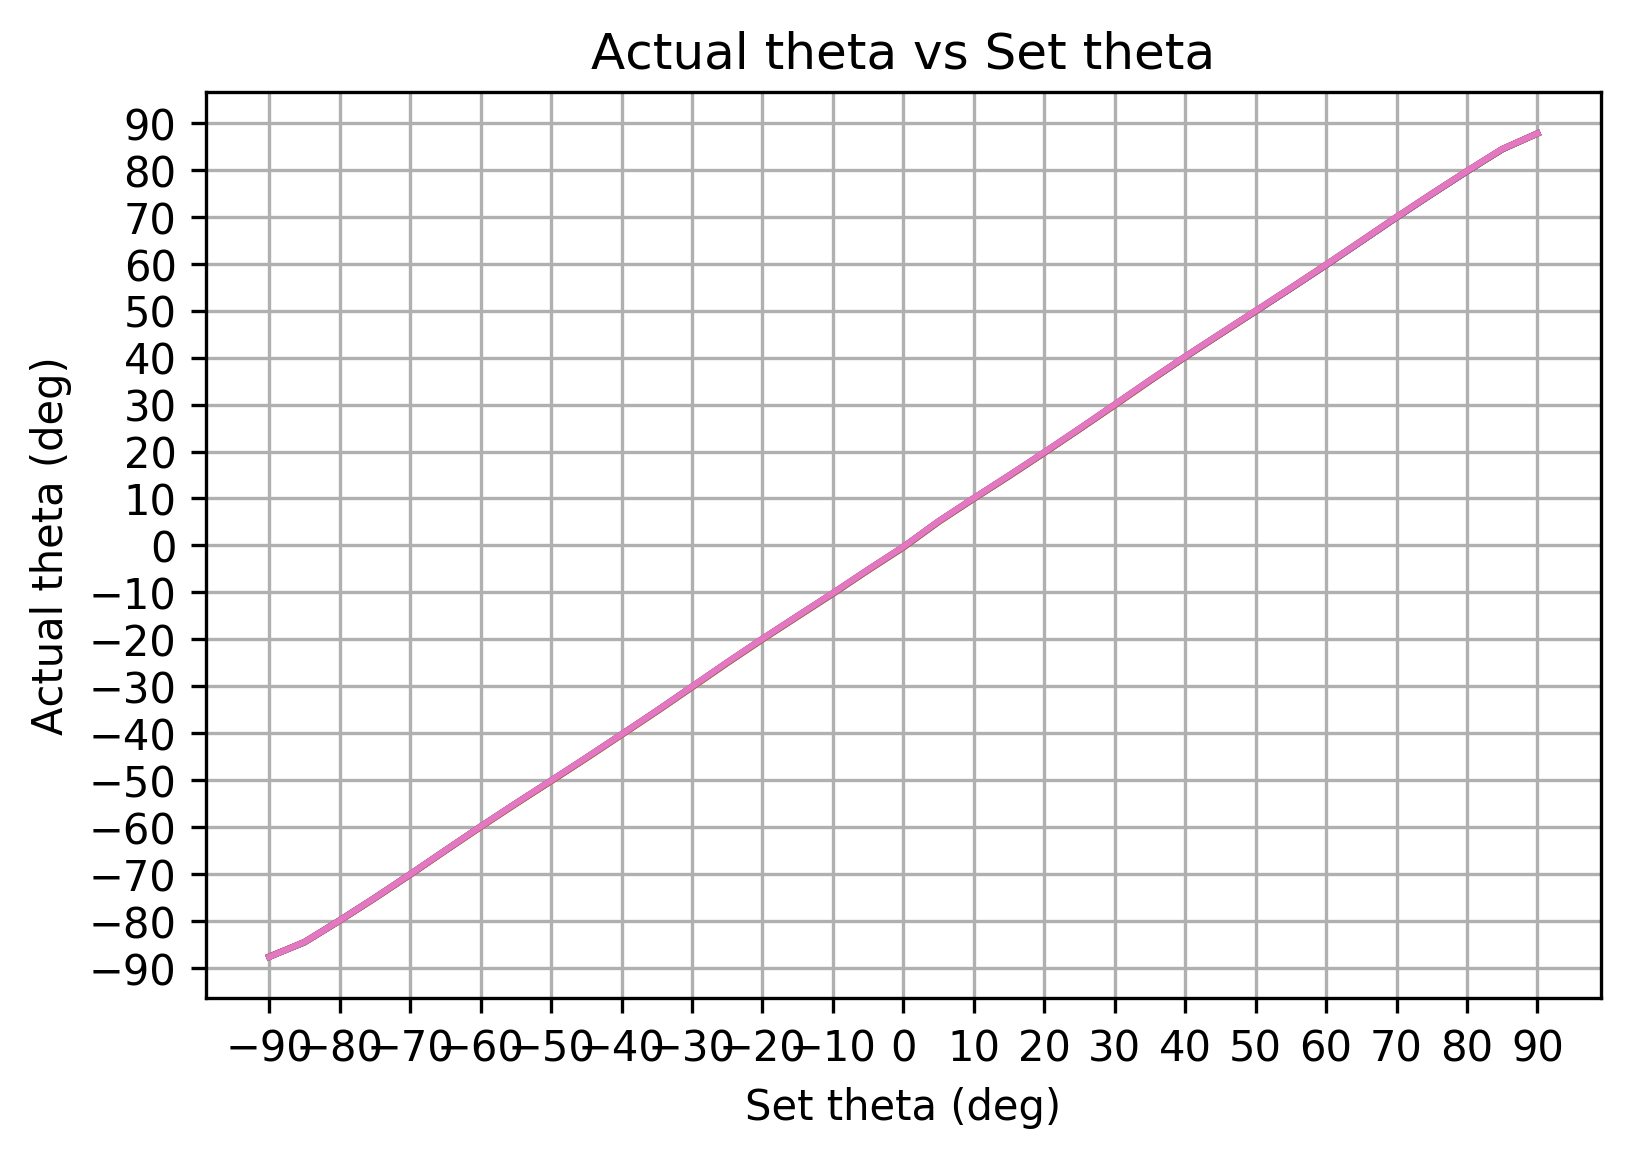

In [23]:
plt.figure(dpi=300)
def plotsd(df):
    plt.plot(df.theta, df.act_theta)

for i in range(len(dfList)):
    plotsd(dfList[i])
    
plt.title('Actual theta vs Set theta')
plt.xlabel('Set theta (deg)')
plt.ylabel('Actual theta (deg)')
plt.yticks(np.arange(-90, 100, 10))
plt.xticks(np.arange(-90, 100, 10))
plt.grid()

In [25]:
df.act_theta.min()

-87.58079536033381

In [26]:
df.act_theta.max()

87.73066328776045